# Loading the Data

In [2]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
# For handling string
import string
# For performing mathematical operations
import math
warnings.filterwarnings("ignore")

In [3]:
# Importing dataset
data=pd.read_csv('HIGGS_6M.csv')
data.head(10)

,1.00E+00,8.69E-01,-6.35E-01,2.26E-01,3.27E-01,-6.90E-01,7.54E-01,-2.49E-01,-1.09E+00,0.00E+00,...,-1.05E-02,-4.58E-02,3.10E+00,1.35E+00,9.80E-01,9.78E-01,9.20E-01,7.22E-01,9.89E-01,8.77E-01
0,1.0,0.908,0.329,0.35900,1.500,-0.313,1.100,-0.5580,-1.5900,2.17,...,-1.1400,-0.000819,0.0,0.302,0.833,0.986,0.978,0.780,0.992,0.798
1,1.0,0.799,1.470,-1.64000,0.454,0.426,1.100,1.2800,1.3800,0.00,...,1.1300,0.900000,0.0,0.910,1.110,0.986,0.951,0.803,0.866,0.780
2,0.0,1.340,-0.877,0.93600,1.990,0.882,1.790,-1.6500,-0.9420,0.00,...,-0.6780,-1.360000,0.0,0.947,1.030,0.999,0.728,0.869,1.030,0.958
3,1.0,1.110,0.321,1.52000,0.883,-1.210,0.681,-1.0700,-0.9220,0.00,...,-0.3740,0.113000,0.0,0.756,1.360,0.987,0.838,1.130,0.872,0.808
4,0.0,1.600,-0.608,0.00707,1.820,-0.112,0.848,-0.5660,1.5800,2.17,...,-0.6540,-1.270000,3.1,0.824,0.938,0.972,0.789,0.431,0.961,0.958
5,1.0,0.409,-1.880,-1.03000,1.670,-1.600,1.340,0.0554,0.0135,2.17,...,0.0695,1.380000,3.1,0.869,1.220,1.000,0.545,0.699,0.977,0.829
6,1.0,0.934,0.629,0.52800,0.238,-0.967,0.548,-0.0594,-1.7100,2.17,...,1.2900,-1.470000,0.0,0.902,1.080,0.980,0.783,0.849,0.894,0.775
7,1.0,1.410,0.537,0.69000,1.180,-0.110,3.200,-1.5300,-1.5800,0.00,...,-0.1510,1.160000,0.0,1.670,4.040,1.180,1.050,1.540,3.530,2.740
8,1.0,1.180,0.104,1.40000,0.480,0.266,1.140,1.5300,-0.2530,0.00,...,0.2690,0.530000,0.0,0.833,0.774,0.986,1.100,0.849,0.937,0.812
9,1.0,0.946,1.110,1.22000,0.908,0.822,1.150,-0.3650,-1.5700,0.00,...,-0.4510,0.063700,3.1,0.829,0.981,0.994,0.908,0.776,0.783,0.725


In [4]:
#labeling the dataset
data.columns = ['Label', 'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','f1','f2','f3','f4','f5','f6','f7']
data.head(10)

,Label,a,b,c,d,e,f,g,h,i,...,s,t,u,f1,f2,f3,f4,f5,f6,f7
0,1.0,0.908,0.329,0.35900,1.500,-0.313,1.100,-0.5580,-1.5900,2.17,...,-1.1400,-0.000819,0.0,0.302,0.833,0.986,0.978,0.780,0.992,0.798
1,1.0,0.799,1.470,-1.64000,0.454,0.426,1.100,1.2800,1.3800,0.00,...,1.1300,0.900000,0.0,0.910,1.110,0.986,0.951,0.803,0.866,0.780
2,0.0,1.340,-0.877,0.93600,1.990,0.882,1.790,-1.6500,-0.9420,0.00,...,-0.6780,-1.360000,0.0,0.947,1.030,0.999,0.728,0.869,1.030,0.958
3,1.0,1.110,0.321,1.52000,0.883,-1.210,0.681,-1.0700,-0.9220,0.00,...,-0.3740,0.113000,0.0,0.756,1.360,0.987,0.838,1.130,0.872,0.808
4,0.0,1.600,-0.608,0.00707,1.820,-0.112,0.848,-0.5660,1.5800,2.17,...,-0.6540,-1.270000,3.1,0.824,0.938,0.972,0.789,0.431,0.961,0.958
5,1.0,0.409,-1.880,-1.03000,1.670,-1.600,1.340,0.0554,0.0135,2.17,...,0.0695,1.380000,3.1,0.869,1.220,1.000,0.545,0.699,0.977,0.829
6,1.0,0.934,0.629,0.52800,0.238,-0.967,0.548,-0.0594,-1.7100,2.17,...,1.2900,-1.470000,0.0,0.902,1.080,0.980,0.783,0.849,0.894,0.775
7,1.0,1.410,0.537,0.69000,1.180,-0.110,3.200,-1.5300,-1.5800,0.00,...,-0.1510,1.160000,0.0,1.670,4.040,1.180,1.050,1.540,3.530,2.740
8,1.0,1.180,0.104,1.40000,0.480,0.266,1.140,1.5300,-0.2530,0.00,...,0.2690,0.530000,0.0,0.833,0.774,0.986,1.100,0.849,0.937,0.812
9,1.0,0.946,1.110,1.22000,0.908,0.822,1.150,-0.3650,-1.5700,0.00,...,-0.4510,0.063700,3.1,0.829,0.981,0.994,0.908,0.776,0.783,0.725


In [5]:
# Getting last 500k rows from data
df = data.iloc[-500000:]

# Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 548575 to 1048574
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Label   500000 non-null  float64
 1   a       500000 non-null  float64
 2   b       500000 non-null  float64
 3   c       500000 non-null  float64
 4   d       500000 non-null  float64
 5   e       500000 non-null  float64
 6   f       500000 non-null  float64
 7   g       500000 non-null  float64
 8   h       500000 non-null  float64
 9   i       500000 non-null  float64
 10  j       500000 non-null  float64
 11  k       500000 non-null  float64
 12  l       500000 non-null  float64
 13  m       500000 non-null  float64
 14  n       500000 non-null  float64
 15  o       500000 non-null  float64
 16  p       500000 non-null  float64
 17  q       500000 non-null  float64
 18  r       500000 non-null  float64
 19  s       500000 non-null  float64
 20  t       500000 non-null  float64
 21  u   

In [7]:
df.describe()

,Label,a,b,c,d,e,f,g,h,i,...,s,t,u,f1,f2,f3,f4,f5,f6,f7
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,0.529866,0.990204,0.002254,-0.001055,0.998281,-0.000121,0.991422,0.001087,0.000404,0.998112,...,-0.000552,-0.000571,0.999235,1.035067,1.025749,1.050189,1.009589,0.973340,1.033758,0.960130
std,0.499108,0.564540,1.009146,1.005989,0.598587,1.006856,0.475389,1.010417,1.005639,1.026094,...,1.007341,1.006110,1.399361,0.680033,0.383375,0.163852,0.397727,0.525215,0.365905,0.313452
min,0.000000,0.275000,-2.430000,-1.740000,0.002250,-1.740000,0.140000,-2.970000,-1.740000,0.000000,...,-2.500000,-1.740000,0.000000,0.101000,0.235000,0.202000,0.186000,0.066600,0.329000,0.351000
25%,0.000000,0.590000,-0.736000,-0.873000,0.575000,-0.871000,0.679000,-0.687000,-0.868000,0.000000,...,-0.714000,-0.871000,0.000000,0.791000,0.847000,0.986000,0.767000,0.674000,0.819000,0.770000
50%,1.000000,0.852000,0.003840,-0.000796,0.892000,-0.000166,0.894000,0.002950,0.001820,1.090000,...,0.000372,-0.004700,0.000000,0.895000,0.951000,0.990000,0.916000,0.874000,0.948000,0.872000
75%,1.000000,1.240000,0.738000,0.868000,1.290000,0.871000,1.170000,0.691000,0.869000,2.170000,...,0.714000,0.872000,3.100000,1.020000,1.080000,1.020000,1.140000,1.140000,1.140000,1.060000
max,1.000000,7.810000,2.430000,1.740000,9.270000,1.740000,7.630000,2.970000,1.740000,2.170000,...,2.500000,1.740000,3.100000,31.100000,15.600000,5.550000,10.800000,12.200000,8.780000,6.180000


In [8]:
# Checking dimention of data
df.shape

(500000, 29)

In [9]:
#to see any null value present in our dataset
df.isnull().sum().max()

0

### No null values present

Text(0, 0.5, 'no of samples')

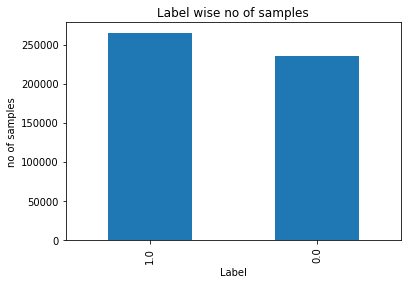

In [10]:
df['Label'].value_counts().plot.bar()
# Add title and axis names
plt.title('Label wise no of samples')
plt.xlabel('Label')
plt.ylabel('no of samples')

<AxesSubplot:ylabel='Label'>

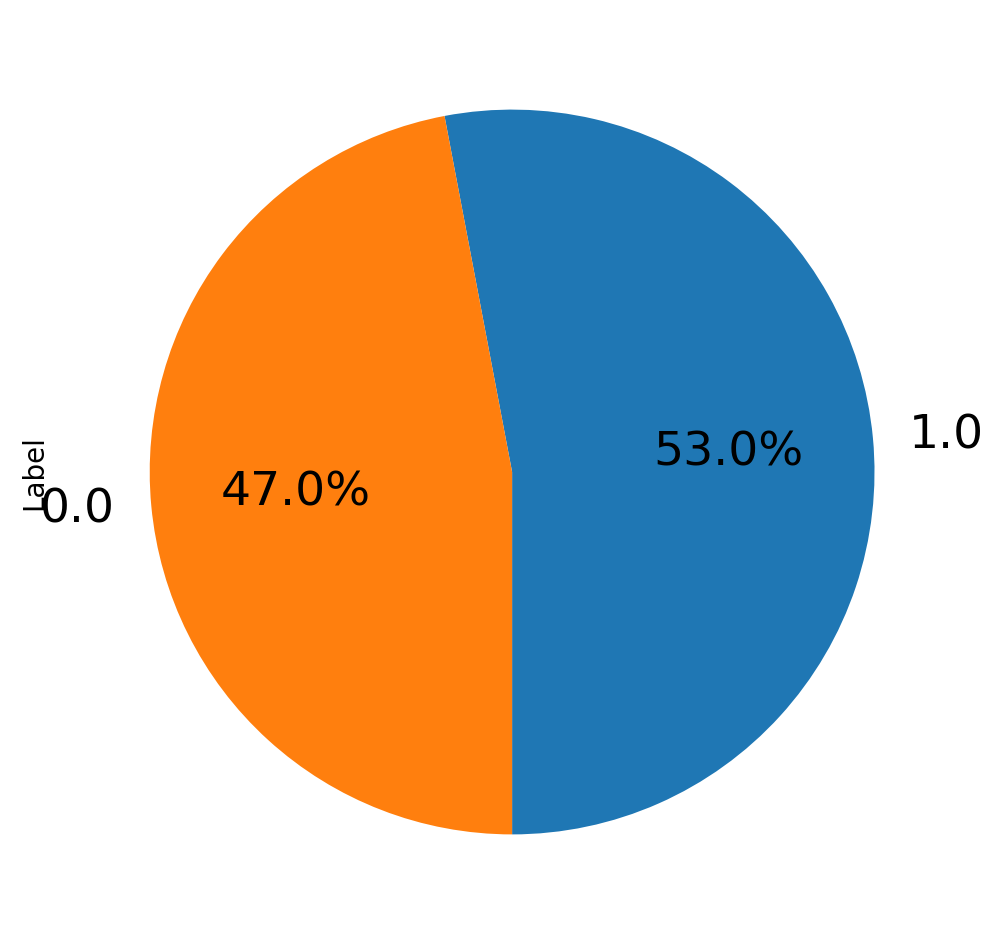

In [11]:
fig = plt.figure(figsize=(6,6), dpi=200)
ax = plt.subplot(111)

df['Label'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17)

### We can see Dataset is  quite balanced

In [12]:
df.columns

Index(['Label', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7'],
      dtype='object')

In [13]:
x_data = df.drop('Label', axis=1)
y = df['Label']

In [14]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [15]:
#split train & test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

# Classification Models

### Logistic Regression

In [16]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 64.12%


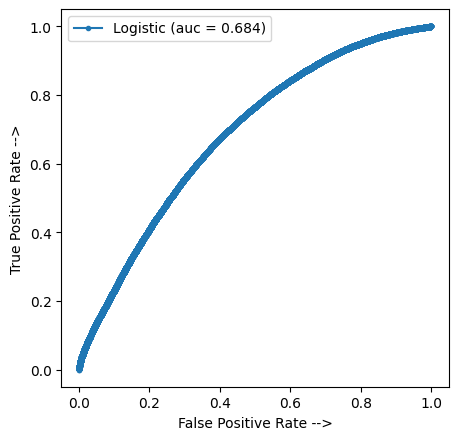

In [17]:
from sklearn.metrics import roc_curve, auc

y_pred_logistic = lr.decision_function(x_test.T)

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test.T, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### K-Nearest Neighbour (KNN) Classification

In [16]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 54.50%


### Decision Tree Algorithm

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 63.85%


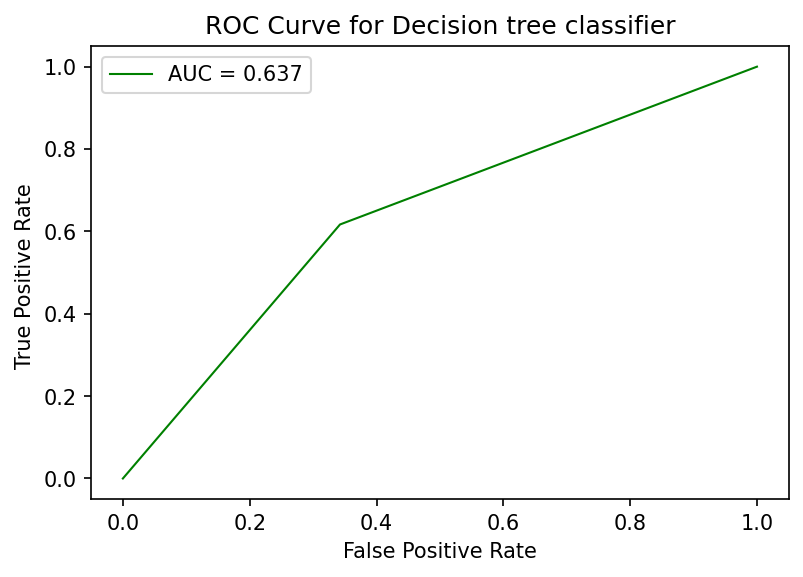

In [19]:

from sklearn.metrics import roc_curve, auc

predictions = dtc.predict_proba(x_test.T)

# get false and true positive rates
dtc_fpr, dtc_tpr, thresholds = roc_curve(y_test.T, predictions[:,0], pos_label=0)
# get area under the curve
dtc_roc_auc = auc(dtc_fpr, dtc_tpr)

# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(dtc_fpr, dtc_tpr, lw=1, color='green', label=f'AUC = {dtc_roc_auc:.3f}')
plt.title('ROC Curve for Decision tree classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()



### Random Forest Classification

In [20]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 73.00%


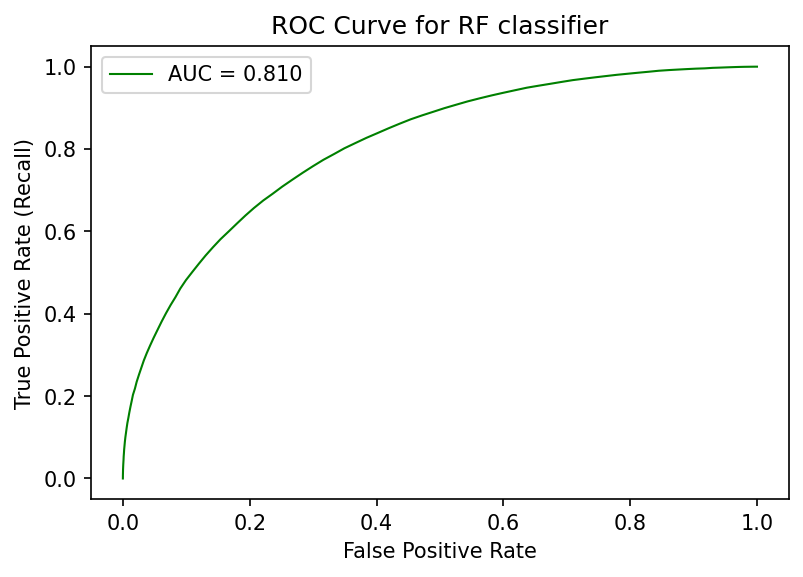

In [21]:
from sklearn.metrics import roc_curve, auc

probas = rf.predict_proba(x_test.T)

# get false and true positive rates
rf_fpr, rf_tpr, thresholds = roc_curve(y_test.T, probas[:,0], pos_label=0)
# get area under the curve
rf_roc_auc = auc(rf_fpr, rf_tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(rf_fpr, rf_tpr, lw=1, color='green', label=f'AUC = {rf_roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


### Comparing Models

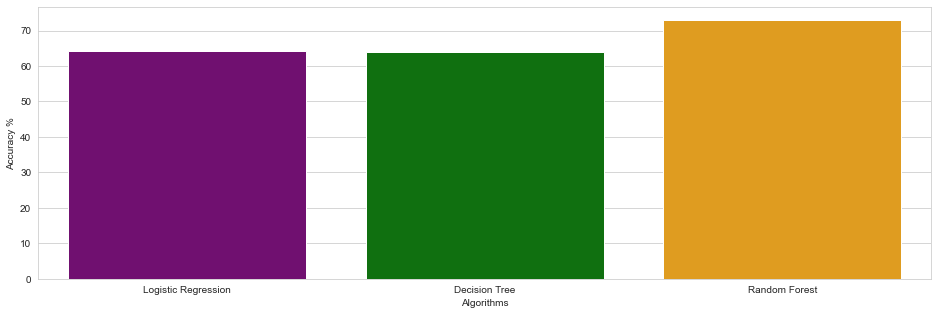

In [22]:
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

### Confusion Matrix

In [24]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [25]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

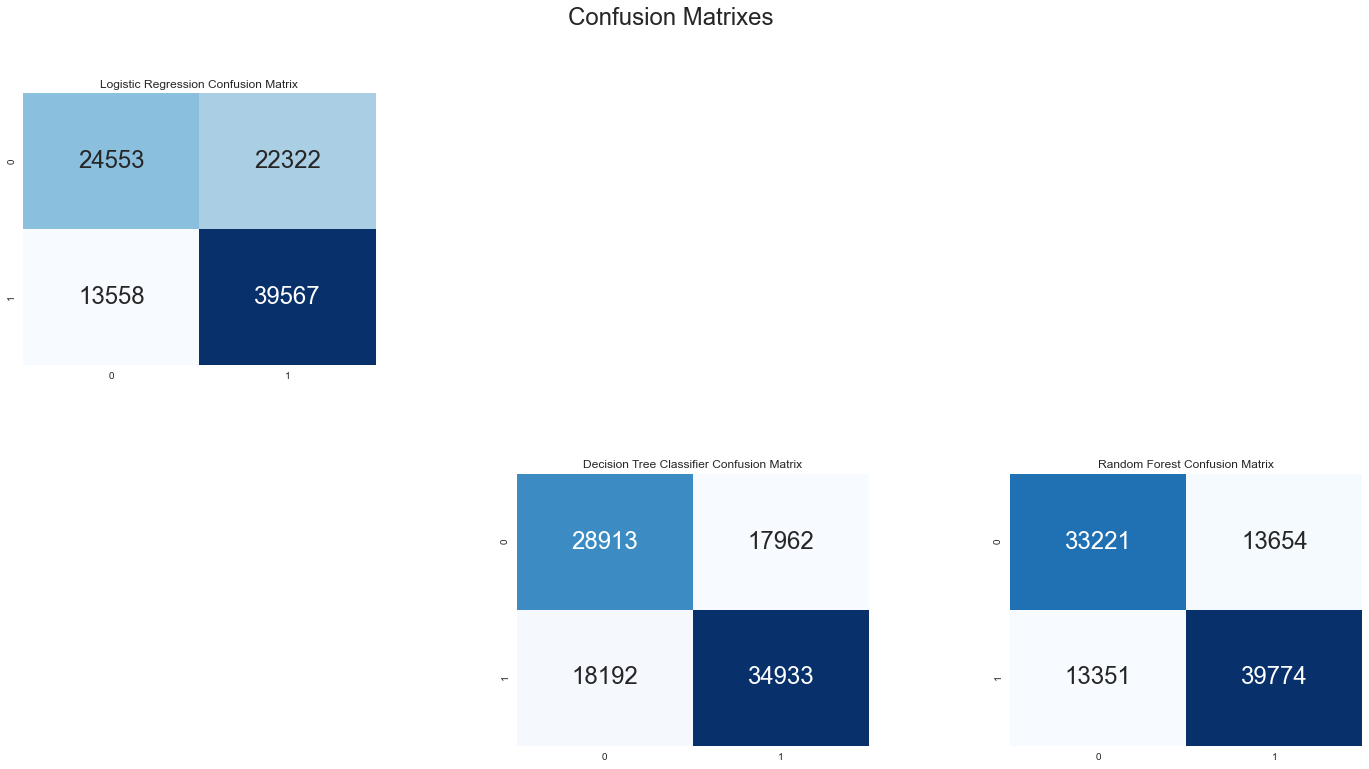

In [26]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()